In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the data
pitch_data = pd.read_parquet('pitches_data.parquet')
pitch_data.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top,id,full_name
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,...,201500001.0,1.0,1,0.0,L,452657,L,True,452657,Jon Lester
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,...,201500001.0,1.0,1,0.0,L,452657,L,True,452657,Jon Lester
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368,...,201500001.0,1.0,1,0.0,L,452657,L,True,452657,Jon Lester
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104,...,201500001.0,1.0,1,0.0,L,452657,L,True,452657,Jon Lester
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280,...,201500001.0,1.0,1,0.0,L,452657,L,True,452657,Jon Lester


In [4]:
pitch_data.columns

Index(['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir',
       'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'sz_bot',
       'sz_top', 'type_confidence', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'y0',
       'z0', 'pfx_x', 'pfx_z', 'nasty', 'zone', 'code', 'type', 'pitch_type',
       'event_num', 'b_score', 'ab_id', 'b_count', 's_count', 'outs',
       'pitch_num', 'on_1b', 'on_2b', 'on_3b', 'batter_id', 'event', 'g_id',
       'inning', 'o', 'p_score', 'p_throws', 'pitcher_id', 'stand', 'top',
       'id', 'full_name'],
      dtype='object')

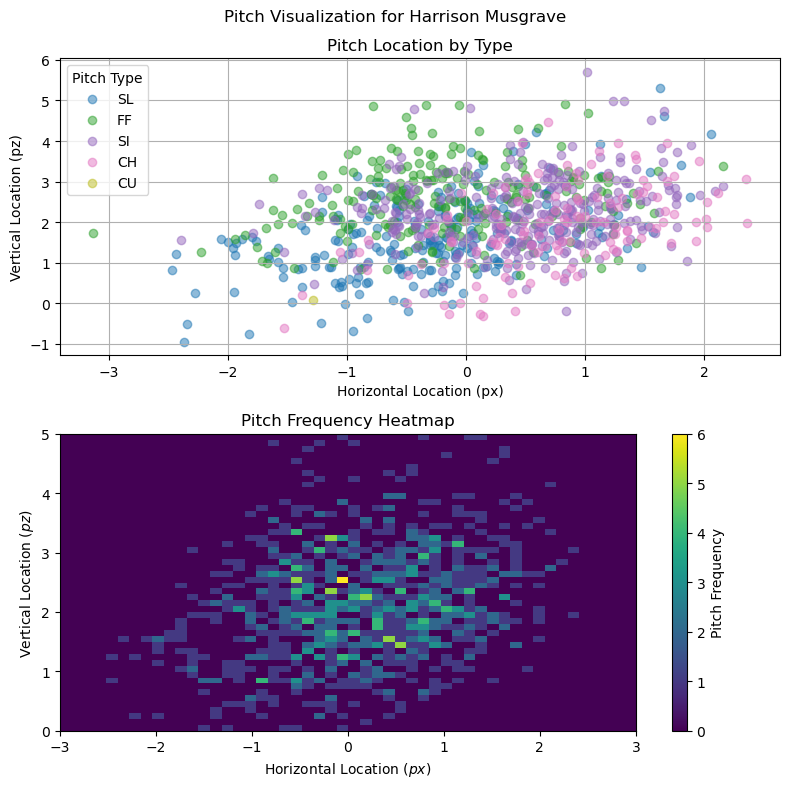

In [37]:
# Create a scatter plot with colors based on pitch type
fig, ax = plt.subplots(2, 1, figsize=(8,8), dpi=100)

'''Plot #1'''
# Get subset data based on desired pitcher.
pitcher_name = np.random.choice(pitch_data.full_name.unique())
pitch_data_p = pitch_data[pitch_data['full_name'] == pitcher_name]

# Create a colormap mapping pitch types to colors
pitch_types = pitch_data_p['pitch_type'].unique()
colors = plt.cm.get_cmap('tab20', len(pitch_types))  # You can choose a different colormap if desired
color_map = {pitch_type: colors(i) for i, pitch_type in enumerate(pitch_types)}

# Iterate through pitch types and plot each type with its corresponding color
for pitch_type, color in color_map.items():
    subset = pitch_data_p[pitch_data_p['pitch_type'] == pitch_type]
    ax[0].scatter(subset['px'], subset['pz'], label=pitch_type, color=color, alpha=0.5)

ax[0].set_xlabel('Horizontal Location (px)')
ax[0].set_ylabel('Vertical Location (pz)')
ax[0].set_title(f'Pitch Location by Type')
ax[0].legend(title='Pitch Type', loc='best')
ax[0].grid(True)

'''Plot #2'''
# Create a 2D histogram to count pitch frequencies in different zones
hist, xedges, yedges = np.histogram2d(pitch_data_p['px'], pitch_data_p['pz'], bins=(50, 50), range=[[-3, 3], [0, 5]])

# Create a heatmap using Matplotlib
img = ax[1].imshow(hist.T, extent=[-3, 3, 0, 5], origin='lower', cmap='viridis', interpolation='nearest', aspect='auto')
# cbar = fig.colorbar(heatmap, ax=axs[0], orientation='vertical', pad=0.02)  # 'vertical' or 'horizontal'
# cbar.set_label('Colorbar Label')
fig.colorbar(img, ax=ax[1], label='Pitch Frequency')
ax[1].set_xlabel('Horizontal Location ($px$)')
ax[1].set_ylabel('Vertical Location ($pz$)')
ax[1].set_title(f'Pitch Frequency Heatmap')
ax[1].grid(False)

plt.suptitle(f"Pitch Visualization for {pitcher_name}")
plt.tight_layout()
plt.show()